# 2. Какая доля продаж приходится на каждый магазин? В каких магазинах наибольший и наименьший объем продаж? Что это за магазины?

In [1]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')

from IPython.display import Image, display

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Загрузка данных
df = pd.read_csv('data/df.csv')

df.date = pd.to_datetime(df.date)
df.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,month,year
0,2013-01-01,1,Автомобильные товары,0.0,0,Quito,Pichincha,D,13,1,2013
1,2013-01-01,1,Уход за детьми,0.0,0,Quito,Pichincha,D,13,1,2013
2,2013-01-01,1,Косметика,0.0,0,Quito,Pichincha,D,13,1,2013
3,2013-01-01,1,Напитки,0.0,0,Quito,Pichincha,D,13,1,2013
4,2013-01-01,1,Книги,0.0,0,Quito,Pichincha,D,13,1,2013


Сделаем группировку данных по каждому магазину и посчитаем суммарные продажи. Затем посмотрим, какой процент от общих продаж приходится на каждый магазин.

In [3]:
stores_count = df.groupby('store_nbr')['sales'].sum()
stores_count = stores_count / stores_count.sum()

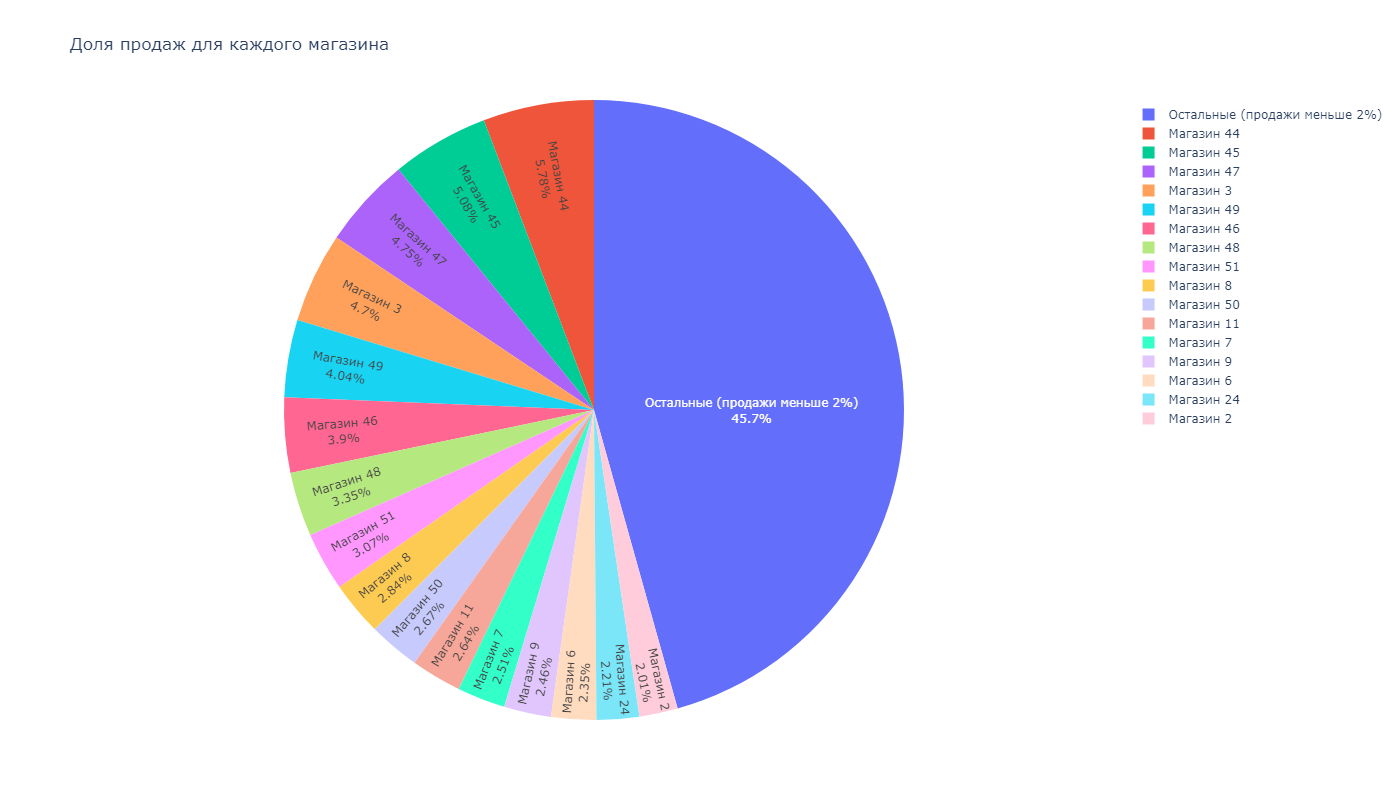

In [4]:
# Возьмем магазины с объемом продаж меньше 2% от общего объема и посчитаем их суммарный процент
threshold = 0.02
filtered_values = stores_count[stores_count < threshold]
sum_filtered = filtered_values.sum()

# Возьмем магазины с объемом продаж больше 2% от общего объема
new_data = stores_count[stores_count >= threshold]

# Соберем все данные в датафрейм
new_data['Остальные (продажи меньше 2%)'] = sum_filtered
new_data = pd.DataFrame(new_data).reset_index()
new_data['store_nbr'] = new_data['store_nbr'].apply(lambda x: 'Магазин ' + str(x) if x!='Остальные (продажи меньше 2%)' else 'Остальные (продажи меньше 2%)')

# Нарисуем график
fig = go.Figure(data=[go.Pie(labels=new_data['store_nbr'], 
                             values=new_data['sales'], 
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])

fig.update_layout(
    autosize=False,
    width=1400,
    height=800,
    title_text='Доля продаж для каждого магазина'
)

fig.show()

display(Image(filename='img/shop_sales.png', width=800))

Сделаем датафрейм, который будет содержать доли продаж в процентном соотношении для каждого магазина.

In [5]:
stores_count = pd.DataFrame(stores_count.reset_index())

stores_count['store'] = stores_count['store_nbr'].apply(lambda x: 'Магазин ' + str(x))
stores_count = stores_count.drop(['store_nbr'], axis=1)
stores_count = stores_count[['store', 'sales']]

stores_count = stores_count.sort_values(by=['sales'], ascending=False)
stores_count['sales_percentage'] = stores_count['sales'] * 100

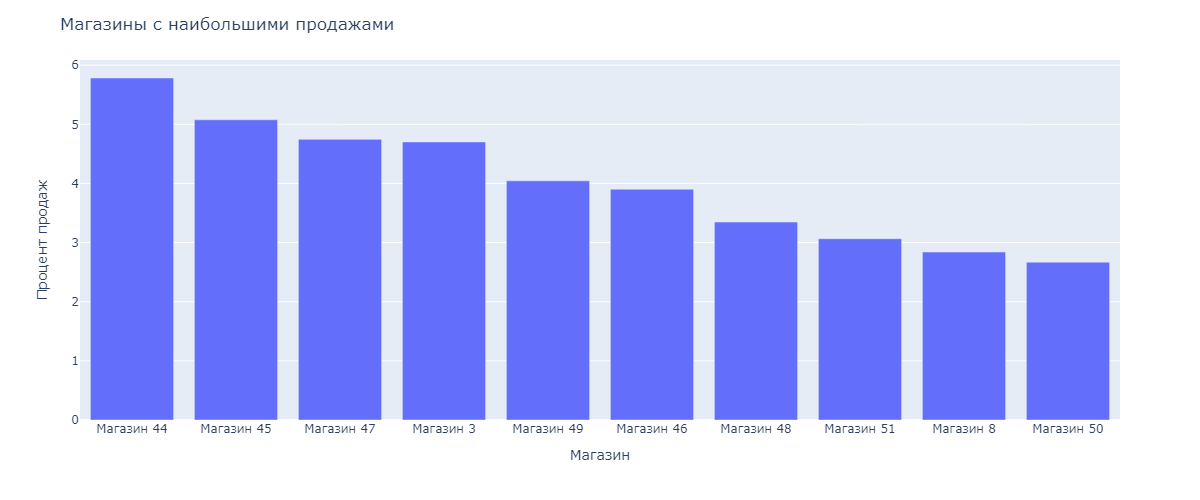

In [6]:
fig = px.bar(stores_count.head(10), 
             x='store', 
             y='sales_percentage',
             labels={'store':'Магазин', 'sales_percentage': 'Процент продаж'},
             height=500,
             width=1200)

fig.update_layout(title_text='Магазины с наибольшими продажами')

fig.show()

display(Image(filename='img/best_shops.png', width=800))

Посмотрим, в каких городах расположены и к какому типу относятся лучшие магазины.

In [7]:
best_shops = df.loc[df['store_nbr'].isin([44, 45, 47, 3, 49, 46, 48, 51, 8, 50])][['store_nbr', 'city', 'state', 'store_type']]
best_shops = best_shops.drop_duplicates()

print(best_shops['city'].value_counts())
print('###############################')
print(best_shops['store_type'].value_counts())

city
Quito        8
Ambato       1
Guayaquil    1
Name: count, dtype: int64
###############################
store_type
A    8
D    2
Name: count, dtype: int64


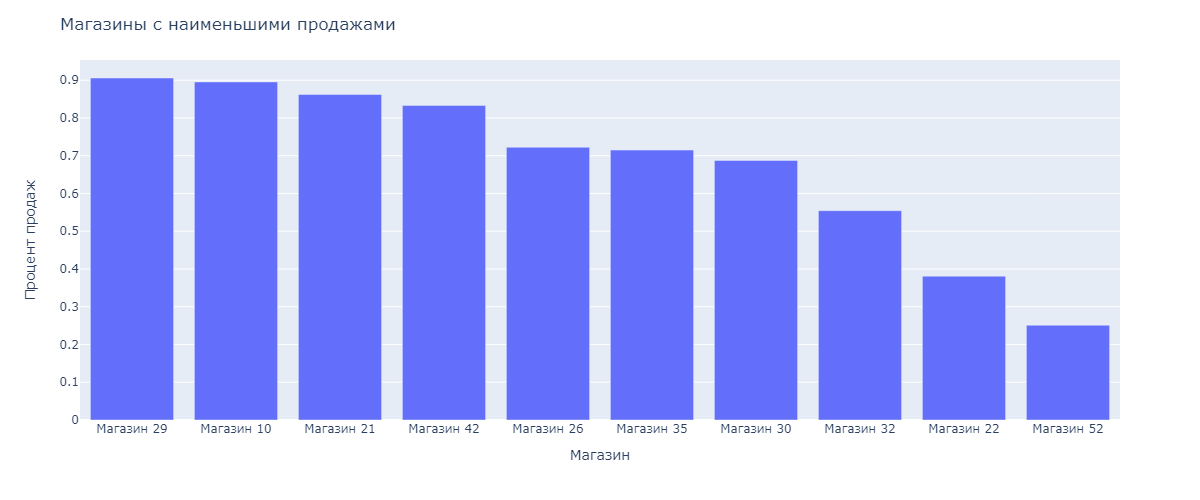

In [8]:
fig = px.bar(stores_count.tail(10), 
             x='store', 
             y='sales_percentage',
             labels={'store':'Магазин', 'sales_percentage': 'Процент продаж'},
             height=500,
             width=1200)

fig.update_layout(title_text='Магазины с наименьшими продажами')

fig.show()

display(Image(filename='img/worst_shops.png', width=800))

Посмотрим, в каких городах расположены и к какому типу относятся худшие магазины.

In [9]:
worst_shops = df.loc[df['store_nbr'].isin([29, 10, 21, 42, 26, 35, 30, 32, 22, 52])][['store_nbr', 'city', 'state', 'store_type']]
worst_shops = worst_shops.drop_duplicates()

print(worst_shops['city'].value_counts())
print('###############################')
print(worst_shops['store_type'].value_counts())

city
Guayaquil        4
Quito            1
Santo Domingo    1
Puyo             1
Playas           1
Cuenca           1
Manta            1
Name: count, dtype: int64
###############################
store_type
C    5
D    2
B    1
E    1
A    1
Name: count, dtype: int64


Большинство магазинов с лучшими продажами находятся в городе Quito, при этом среди лучших магазинов наиболее часто встречаются магазины типа A.

Из 10 магазинов с самыми низкими продажами 4 находятся в городе Guayaquil. Половина магазинов с низкими продажами имеют тип C.